In [1]:
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as stats

import numpy as np
import sklearn


import os

def predict(x):
    return slope * x + intercept

datapath = os.path.join("datasets", "lifesat", "")
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"  
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]


oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(
	datapath + "gdp_per_capita.csv",
	thousands=',',delimiter='\t', 
	encoding='latin1', na_values="n/a"
)


data_set = prepare_country_stats( oecd_bli, gdp_per_capita)


In [2]:
data_set

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


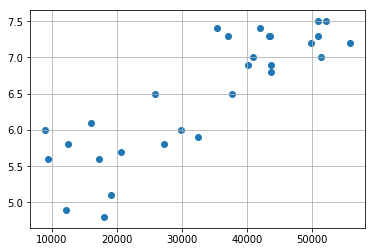

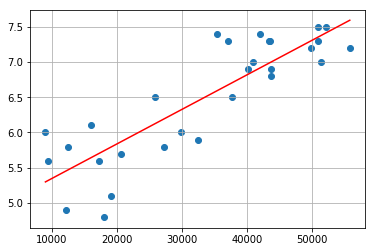

5.3442072591822845


In [3]:
X = data_set.iloc[0:len(data_set),0]
Y = data_set.iloc[0:len(data_set),1] 
axes = plt.axes()
axes.grid()
plt.scatter(X,Y)
plt.show()


X = data_set.iloc[0:len(data_set),0]
Y = data_set.iloc[0:len(data_set),1] 
axes = plt.axes()
axes.grid()
plt.scatter(X,Y)

slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
fitLine = predict(X)
plt.plot(X, fitLine, c='r')
plt.show()

print(predict(10000))
